In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as sklearn_lm
import sklearn.preprocessing as sklearn_pproc
import matplotlib.pyplot as mp_plt
%matplotlib inline

In [3]:
# load data
data_names = ['x1','x2','y']
data = pd.read_csv('1D_regression_data.csv', delimiter=',', header=None)
data = data.values

Automatically created module for IPython interactive environment


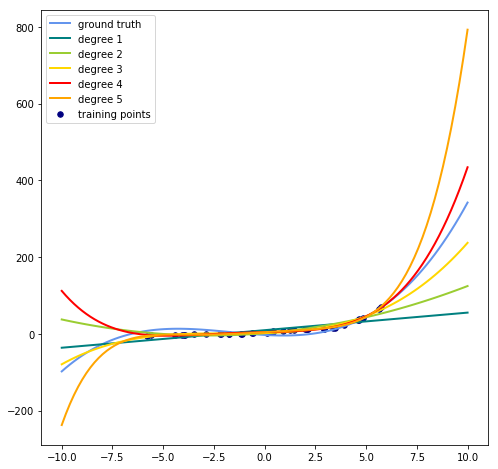

In [27]:
print(__doc__)

# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def f(x):
  return (0.25*x**3 + 1.25*x**2 - 3*x - 3)

# generate points used to plot
x_plot = np.linspace(-10, 10, 100)

# generate points and keep a subset of them
rng = np.random.RandomState(0)
rng.shuffle(data)
idx = np.random.choice(data.shape[0], 40, replace=False)
x = np.sort(data[idx,0])
y = np.sort(data[idx,1])

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

mp_plt.figure(figsize=(8,8))
colors = ['teal', 'yellowgreen', 'gold', 'red', 'orange']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([1,2,3,4,5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='upper left')

plt.show()

Automatically created module for IPython interactive environment


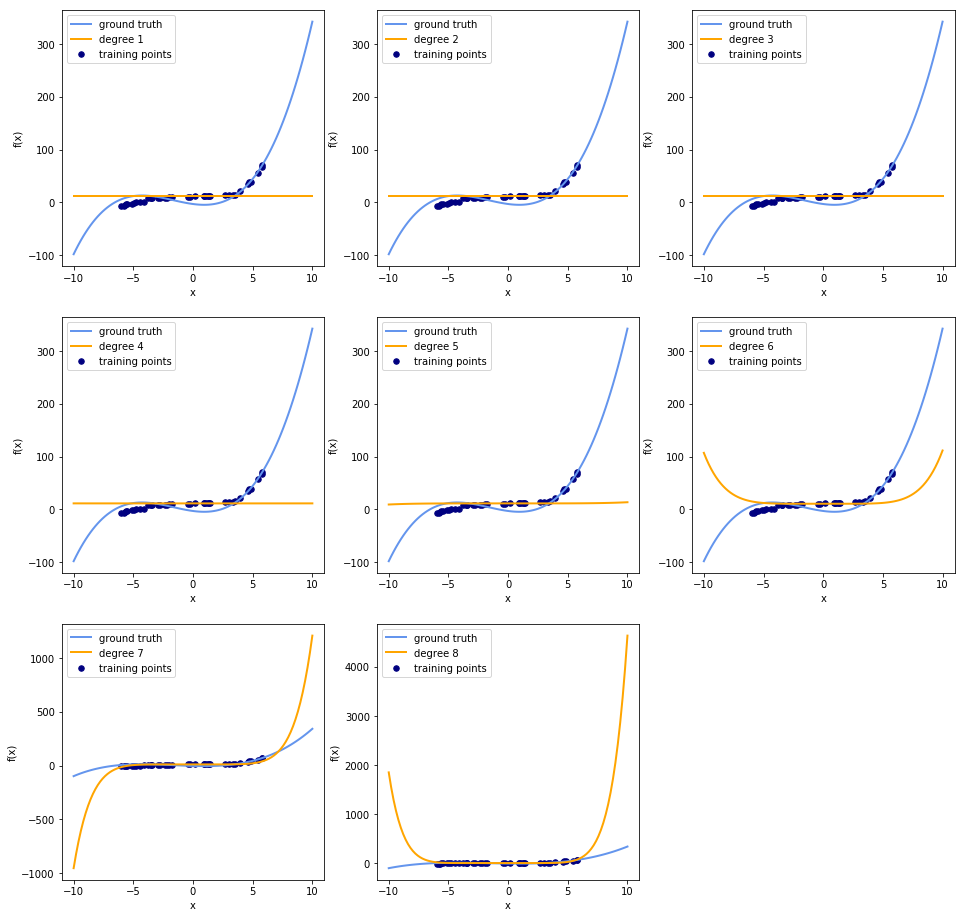

<Figure size 432x288 with 0 Axes>

In [42]:
print(__doc__)

# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def f(x):
  return (0.25*x**3 + 1.25*x**2 - 3*x - 3)

# generate points used to plot
x_plot = np.linspace(-10, 10, 100)

# generate points and keep a subset of them
rng = np.random.RandomState(0)
rng.shuffle(data)
idx = np.random.choice(data.shape[0], 40, replace=False)
x = np.sort(data[idx,0])
y = np.sort(data[idx,1])
x_all = data[:,0]
y_all = data[:,1]

# create matrix versions of these arrays
X = x_all[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

mp_plt.figure(figsize=(16,16))
colors = ['teal', 'yellow', 'green', 'gold', 'red', 'orange']
lw = 2
for count, degree in enumerate([1,2,3,4,5,6,7,8]):
  plt.subplot(3,3,count+1)
  plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
  plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
  model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1e11))
  model.fit(X, y_all)
  y_plot = model.predict(X_plot)
  plt.plot(x_plot, y_plot, color='orange', linewidth=lw,
           label="degree %d" % degree)
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.legend(loc='upper left')

plt.show()
plt.savefig('141.pdf')